In [1]:
import numpy as np
import pandas as pd 


import matplotlib.pyplot as plt
import cv2

from pathlib import Path

<ipython-input-33-1fd39a589c43>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  images_np = np.array(image_collection)


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [143 157 156]
  [181 195 194]
  [243 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [226 238 238]
  [244 255 255]
  [239 251 251]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [245 255 255]
  [243 252 255]
  [241 250 253]]]


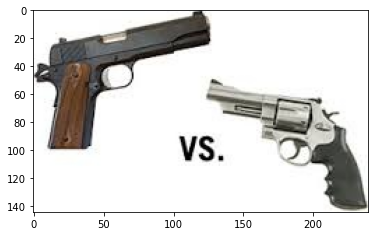

In [33]:
gun_path = Path("gun")
image_collection = []

for gun in gun_path.rglob("*.jpg"): 
    image_collection.append(cv2.imread(str(gun)))
    
# shape=image.shape
plt.figure()
images_np = np.array(image_collection)

print(image_collection[0])
plt.imshow(image_collection[0][:,:,::-1])

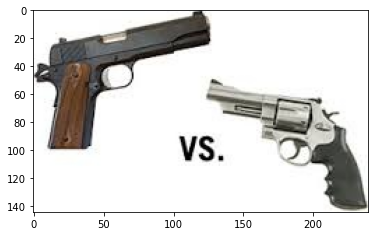

In [35]:
images_np.shape
plt.imshow(images_np[0][:,:,::-1])

In [40]:
gun_path = Path("gun")
label_collection = []

for gun_txt in gun_path.rglob("*.txt"): 
    label_collection.append(read_label(str(gun_txt)))

NameError: name 'read_label' is not defined

In [119]:
label = read_label("264.txt")
x1, y1, x2, y2 = process_label(label)

In [109]:
def from_yolo_to_cor(box, shape):
    img_h, img_w, _ = shape
    x1, y1 = int((box[0] + box[2]/2)*img_w), int((box[1] + box[3]/2)*img_h)
    x2, y2 = int((box[0] - box[2]/2)*img_w), int((box[1] - box[3]/2)*img_h)
    return x1, y1, x2, y2

In [110]:
def process_label(labels): 
    labels = label.split('\n')
    labels0 = [float(i) for i in labels[0].split()]
    #labels1 = [float(i) for i in labels[1].split()]

    labels0.remove(1)
    #labels1.remove(1)

    [x11,y11,x12,y12] = from_yolo_to_cor(labels0,shape)
    #[x21,y21,x22,y22] = from_yolo_to_cor(labels1,shape)
    
    return [x11,y11,x12,y12]

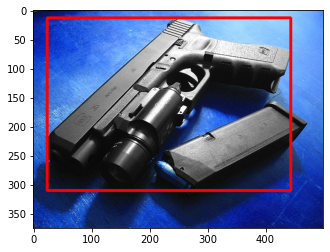

In [120]:
image = cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,0), 3)
plt.imshow(image)